# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [2]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [26]:
# train 데이터 불러오기
df = pd.read_csv("/content/gdrive/MyDrive/Ybigta/Regression/graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [27]:
# test 데이터 불러오기
test = pd.read_csv("/content/gdrive/MyDrive/Ybigta/Regression/graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [28]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Chance of Admit      0.0
Research             0.0
CGPA                 0.0
LOR                  0.0
SOP                  0.0
University Rating    0.0
TOEFL Score          0.0
GRE Score            0.0
dtype: float64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. isnull()함수와 sum()을 통해 결측치의 개수를 구하고, len(df)로 나눠 비율을 구해본 결과 결측치는 없었다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [7]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

In [8]:
df_dum = pd.get_dummies(df)
df_dum.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1,0
1,307,105,2,2.5,4.5,8.12,0.67,0,1
2,329,111,4,4.5,4.0,9.01,0.81,0,1
3,300,105,1,1.0,2.0,7.80,0.58,1,0
4,329,114,5,4.0,5.0,9.30,0.86,0,1


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. 'Research'가 범주형 변수에 해당된다. 이를 더미변수로 만들어 처리했다. 

[]

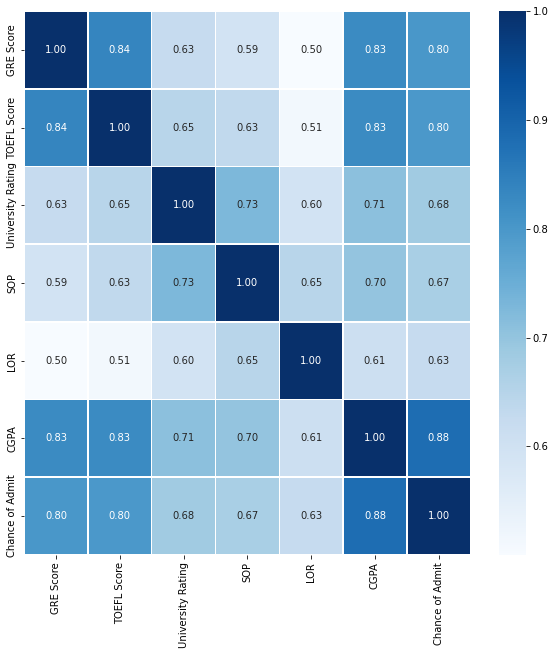

In [9]:
# 숫자형 자료 변수 간 상관관계 분석

df_cor = df.drop("Research", axis =1)
plt.figure(figsize=(10, 10))
sns.heatmap(data=df_cor.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="Blues")
plt.plot()

# 3. 선형(Linear) 회귀

In [29]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df_dum.drop('Chance of Admit', axis=1)
y = df_dum['Chance of Admit']

In [30]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [31]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# 1. 먼저 모델을 만들어 줍니다.
linear = LinearRegression()

# 2. 모델을 적합시킵니다.
linear.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % linear.score(X_train, y_train))
print("Test R^2: %.2f" % linear.score(X_test, y_test))

Training R^2: 0.83
Test R^2: 0.77


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# 4. X_test로 y_pred를 만들어줍니다.

y_pred = linear.predict(X_test)

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('R^2 Variance score: %.4f' % r2_score(y_test, y_pred))


MSE: 0.0040
R^2 Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [17]:
print("intercept:", linear.intercept_)

intercept: -1.2419421437018687


**Q. 절편 계수의 의미는 무엇인가요?**

A. 예측 회귀선을 나타내는 y^ = b0 + b1x 식에서 b0에 해당되는 값을 절편계수(y intercept)라고 하며,

독립변수 X가 모두 0일 때, 종속변수 y의 값을 의미한다. 

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [18]:
beta = pd.DataFrame(linear.coef_, index=X.columns, columns=["slope"])
beta.sort_values("slope")

,slope
Research_No,-0.013241
GRE Score,0.001640
University Rating,0.002748
TOEFL Score,0.003606
SOP,0.007253
Research_Yes,0.013241
LOR,0.017343
CGPA,0.112079


**Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?**  

A. 예측 회귀선을 나타내는 y^ = b0 + b1x 식에서 b1에 해당되는 값을 기울기 계수(slope)라고 한다. 이 계수는 독립변수 X의 변화에 따라 예측하고자 하는 종속변수 y가 반응하는 정도를 의미한다. 이 계수가 양수일 때, X값이 커지면 y값도 증가하는 positive slope line이 생성된다. (vice versa)

어떤 독립변수(예측변인)의 slope value 크기가 클수록 종속변수(대학원 합격 확률)와 유의미한 관계를 갖고 있다고 볼 수 있기에 CGPA 값이 대학원 합격 확률을 예측함에 있어 가장 유의미한 변인이라고 해석할 수 있다. 또한, positive slope 값을 갖으므로 종속변수와 비례 관계이며 CGPA 값이 클수록 대학원 합격 확률이 높을 것이라고 유추할 수 있다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

[]

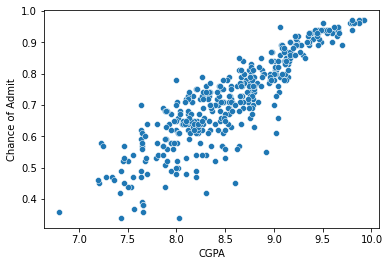

In [19]:
sns.scatterplot(x="CGPA", y="Chance of Admit", data=df)
plt.plot()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

[]

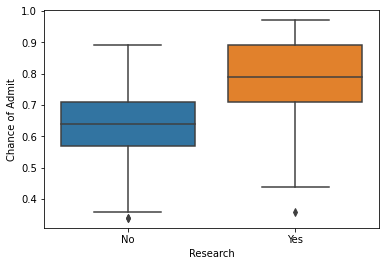

In [20]:
sns.boxplot(x="Research", y="Chance of Admit", data=df)
plt.plot()

### 3.2. StatsModels로 선형 회귀 시행하기

In [21]:
import statsmodels.api as sm

In [22]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          1.99e-114
Time:                        03:06:40   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Model : OLS (Ordinary Least Squares)
- No.Observations : 전체표본 수 = 320 
- Df Model : 독립변수의 개수 = 7
- Df Residuals : 전체표본 수 - (독립변수 개수 + 종속변수 개수) = 320 - (1+7) = 312
- R-squared : 결정계수 (전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율. 1에 가까울수록 좋음) = 0.826 
- F-statistic : F통계량 (MSR/MSE) = 211.6
- Prob(F-statistic) : F통계량에 해당하는 P-value (0.05 이하라면 회귀모델 전체에 대해 통계적으로 유의미) = 1.99e-114 
- coef : 계수 추정치
- P>|t| : 독립변수의 유의 확률 (95%의 신뢰도를 가져야 유의미하다고 판단하며 이 경우 유의 확률은 0.05보다 작은 값)
- Durbin-Watson : DW 검정 (잔차의 독립성을 확인할 수 있는 수치) = 1.968
  - 보통 1.5~2.5 이면 독립으로 판단 = 적합한 회귀 모델
  - 0이나 4에 가깝다면 잔차들이 자기상관을 가졌다는 의미 = 적합 X

**Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?**  
A. 전체 데이터 중 이 회귀모델이 설명할 수 있는 데이터의 비율, 즉 모델의 설명 성능을 나타내는 R^2 값은 0.826으로 1에 가까운 큰 수치를 나타내므로 좋은 모델이라고 할 수 있다. 또한, F통계량에 해당하는 p-value 값인 Prob(F-statisfic) 값이 0.05 이하이므로 통계적으로 유의미한 좋은 모델이라고 할 수 있다. 

**Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?**  
A. 독립변수의 유의 확률을 나타내는 p-value 값은 0.05보다 작아야 유의미하다고 해석할 수 있다. 그러나 'University Rating'의 p-value(P>|t|) 값은 0.561 이므로 통계적으로 종속변수(대학원 합격률)에 대해 유의미하지 않은 변수라고 볼 수 있다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [23]:
from sklearn.linear_model import RidgeCV
# cv (cross validation, K-fold 교차 검증) : 데이터를 지정한 k개로 나눈 뒤 k번씩 자체검증을 통해 정확도를 올림

# 1. 먼저 모델을 만들어 줍니다.
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 2.55, 2.6, 2.75, 3, 5]
ridge = RidgeCV(alphas = alphas, cv = 5)

# 2. 모델을 적합시킵니다.
ridge.fit(X_train, y_train)

# 최적의 알파값 찾기 -> 2.5
print('Optimal alpha :', ridge.alpha_)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % ridge.score(X_train, y_train))
print("Test R^2: %.2f" % ridge.score(X_test, y_test))



Optimal alpha : 2.5
Training R^2: 0.83
Test R^2: 0.77


In [24]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
alphas = [0.0001, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.0005, 0.006, 0.001, 0.01, 0.5, 1]
lasso = LassoCV(alphas = alphas, cv = 5)

# 2. 모델을 적합시킵니다.
lasso.fit(X_train, y_train)

# 최적의 알파값 찾기 -> 0.0003
print('Optimal alpha :', lasso.alpha_)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % lasso.score(X_train, y_train))
print("Test R^2: %.2f" % lasso.score(X_test, y_test))

Optimal alpha : 0.0003
Training R^2: 0.83
Test R^2: 0.77


# Testing

In [88]:
# test 데이터 불러오기
test = pd.read_csv("/content/gdrive/MyDrive/Ybigta/Regression/graduate_test.csv")
print("data size:", test.shape)
test.head(10)

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


In [89]:
test_dum = pd.get_dummies(test)
test_dum.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes
0,304,103,5,5.0,4.0,8.64,1,0
1,297,96,2,2.5,1.5,7.89,1,0
2,302,101,2,2.5,3.5,7.96,1,0
3,318,112,3,4.0,3.5,8.67,1,0
4,304,100,4,1.5,2.5,7.84,1,0
5,330,116,4,5.0,4.5,9.45,0,1
6,315,110,2,3.5,3.0,8.46,0,1
7,317,107,3,4.0,3.0,8.70,1,0
8,330,114,3,4.5,4.5,9.24,0,1
9,323,111,5,4.0,5.0,9.86,0,1


In [90]:
prediction = lasso.predict(test_dum)
test_dum['Chance of Admit'] = prediction
test_dum.head(10)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes,Chance of Admit
0,304,103,5,5.0,4.0,8.64,1,0,0.701484
1,297,96,2,2.5,1.5,7.89,1,0,0.511323
2,302,101,2,2.5,3.5,7.96,1,0,0.581150
3,318,112,3,4.0,3.5,8.67,1,0,0.741140
4,304,100,4,1.5,2.5,7.84,1,0,0.548835
5,330,116,4,5.0,4.5,9.45,0,1,0.914549
6,315,110,2,3.5,3.0,8.46,0,1,0.715262
7,317,107,3,4.0,3.0,8.70,1,0,0.715418
8,330,114,3,4.5,4.5,9.24,0,1,0.877786
9,323,111,5,4.0,5.0,9.86,0,1,0.932920


In [91]:
test_dum['Admit'] =test_dum['Chance of Admit'].apply(lambda x : 'admit' if x > 0.8 else 'no_admit')
test_dum.head(10)



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes,Chance of Admit,Admit
0,304,103,5,5.0,4.0,8.64,1,0,0.701484,no_admit
1,297,96,2,2.5,1.5,7.89,1,0,0.511323,no_admit
2,302,101,2,2.5,3.5,7.96,1,0,0.581150,no_admit
3,318,112,3,4.0,3.5,8.67,1,0,0.741140,no_admit
4,304,100,4,1.5,2.5,7.84,1,0,0.548835,no_admit
5,330,116,4,5.0,4.5,9.45,0,1,0.914549,admit
6,315,110,2,3.5,3.0,8.46,0,1,0.715262,no_admit
7,317,107,3,4.0,3.0,8.70,1,0,0.715418,no_admit
8,330,114,3,4.5,4.5,9.24,0,1,0.877786,admit
9,323,111,5,4.0,5.0,9.86,0,1,0.932920,admit


In [92]:
test_dum.to_csv('graduate_submission.csv')